In [1]:
#import warnings; warnings.simplefilter('ignore')

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


## Import packages

In [1]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline


from sklearn import model_selection, preprocessing, metrics


pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [3]:
def read_csv(csv_file, nrows=None):
    df = pd.read_csv(csv_file, nrows=nrows)
    print("File = {}".format(csv_file))
    print("Shape = {:,} rows, {:,} columns".format(df.shape[0], df.shape[1]))
    print("Memory usage = {:.2f}GB".format(df.memory_usage().sum() / 1024**3))
    return df

data_dir = "C:/Users/CP342862/Desktop/Xente/"
EntireSample = read_csv(data_dir + "training.csv")

File = C:/Users/CP342862/Desktop/Xente/training.csv
Shape = 95,662 rows, 16 columns
Memory usage = 0.01GB


In [4]:
EntireSample.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
EntireSample["FraudResult"].mean()

0.00201752001839811

## Die ding is rof!

In [6]:


def IDcruncher(ID_Vars):

    for var in ID_Vars:
        ' This function loops through IDs'
        print(var)

        print("Unique")
        print()
        print(EntireSample[var].unique())
        print()
        print("Describe")
        print()
        print(EntireSample[var].describe())
        print()

        EntireSample[var+"_Num"]=EntireSample[var].str.extract('(\d+)').astype(int)
        print()
        print("Describe")
        print()
        print(EntireSample[var +"_Num"].describe())
        print()
        print("View in dataset")
        print()
        print(EntireSample.head())
        a=plt.hist(EntireSample[var+"_Num"],bins=30,color="lightgrey")
        plt.show()
        print("-----------------------------------------------------------------------------------------------")
    
   

In [7]:
## ID Columns

ID_Vars = [col for col in EntireSample if col.endswith('Id')]
ID_Vars

['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'ProviderId',
 'ProductId',
 'ChannelId']

TransactionId
Unique

['TransactionId_76871' 'TransactionId_73770' 'TransactionId_26203' ...
 'TransactionId_82501' 'TransactionId_136354' 'TransactionId_35670']

Describe

count                    95662
unique                   95662
top       TransactionId_112877
freq                         1
Name: TransactionId, dtype: object


Describe

count     95662.000000
mean      70334.481581
std       40626.774116
min           1.000000
25%       35235.250000
50%       70319.500000
75%      105542.750000
max      140681.000000
Name: TransactionId_Num, dtype: float64

View in dataset

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28

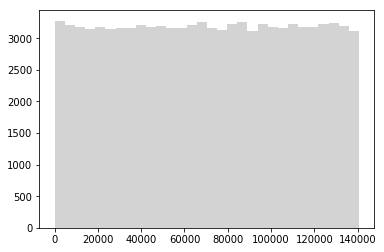

-----------------------------------------------------------------------------------------------
BatchId
Unique

['BatchId_36123' 'BatchId_15642' 'BatchId_53941' ... 'BatchId_118602'
 'BatchId_70924' 'BatchId_29317']

Describe

count             95662
unique            94809
top       BatchId_67019
freq                 28
Name: BatchId, dtype: object


Describe

count     95662.000000
mean      70526.339173
std       40586.254942
min           2.000000
25%       35468.500000
50%       70614.000000
75%      105627.750000
max      139493.000000
Name: BatchId_Num, dtype: float64

View in dataset

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  Tr

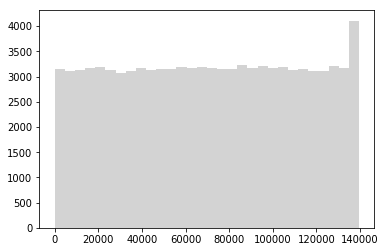

-----------------------------------------------------------------------------------------------
AccountId
Unique

['AccountId_3957' 'AccountId_4841' 'AccountId_4229' ... 'AccountId_557'
 'AccountId_2476' 'AccountId_1685']

Describe

count              95662
unique              3633
top       AccountId_4841
freq               30893
Name: AccountId, dtype: object


Describe

count    95662.000000
mean      3361.571648
std       1560.040065
min          1.000000
25%       2203.000000
50%       3919.000000
75%       4841.000000
max       4841.000000
Name: AccountId_Num, dtype: float64

View in dataset

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   

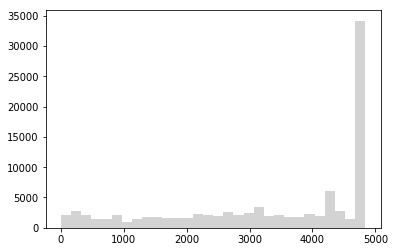

-----------------------------------------------------------------------------------------------
SubscriptionId
Unique

['SubscriptionId_887' 'SubscriptionId_3829' 'SubscriptionId_222' ...
 'SubscriptionId_4806' 'SubscriptionId_3567' 'SubscriptionId_84']

Describe

count                   95662
unique                   3627
top       SubscriptionId_3829
freq                    32630
Name: SubscriptionId, dtype: object


Describe

count    95662.000000
mean      3023.115845
std       1293.973071
min          2.000000
25%       2067.000000
50%       3829.000000
75%       3829.000000
max       4836.000000
Name: SubscriptionId_Num, dtype: float64

View in dataset

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    Transaction

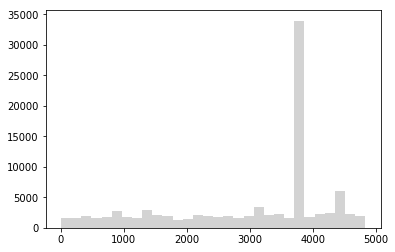

-----------------------------------------------------------------------------------------------
CustomerId
Unique

['CustomerId_4406' 'CustomerId_4683' 'CustomerId_988' ... 'CustomerId_893'
 'CustomerId_2892' 'CustomerId_2067']

Describe

count               95662
unique               3742
top       CustomerId_7343
freq                 4091
Name: CustomerId, dtype: object


Describe

count    95662.000000
mean      3126.883590
std       1650.972455
min          1.000000
25%       1875.000000
50%       3124.000000
75%       4229.000000
max       7479.000000
Name: CustomerId_Num, dtype: float64

View in dataset

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  Subscripti

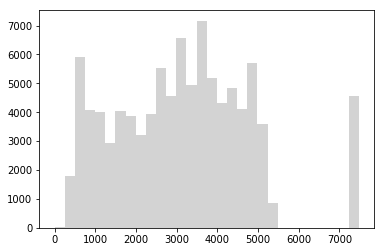

-----------------------------------------------------------------------------------------------
ProviderId
Unique

['ProviderId_6' 'ProviderId_4' 'ProviderId_1' 'ProviderId_5'
 'ProviderId_3' 'ProviderId_2']

Describe

count            95662
unique               6
top       ProviderId_4
freq             38189
Name: ProviderId, dtype: object


Describe

count    95662.000000
mean         4.657157
std          1.309014
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          6.000000
Name: ProviderId_Num, dtype: float64

View in dataset

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28

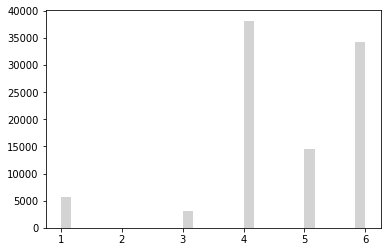

-----------------------------------------------------------------------------------------------
ProductId
Unique

['ProductId_10' 'ProductId_6' 'ProductId_1' 'ProductId_21' 'ProductId_3'
 'ProductId_15' 'ProductId_11' 'ProductId_19' 'ProductId_4' 'ProductId_5'
 'ProductId_20' 'ProductId_9' 'ProductId_24' 'ProductId_14' 'ProductId_2'
 'ProductId_13' 'ProductId_22' 'ProductId_8' 'ProductId_7' 'ProductId_27'
 'ProductId_12' 'ProductId_16' 'ProductId_23']

Describe

count           95662
unique             23
top       ProductId_6
freq            32635
Name: ProductId, dtype: object


Describe

count    95662.000000
mean         7.419069
std          4.655919
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         27.000000
Name: ProductId_Num, dtype: float64

View in dataset

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  Transaction

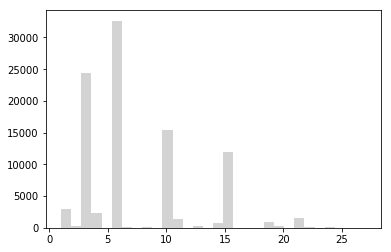

-----------------------------------------------------------------------------------------------
ChannelId
Unique

['ChannelId_3' 'ChannelId_2' 'ChannelId_1' 'ChannelId_5']

Describe

count           95662
unique              4
top       ChannelId_3
freq            56935
Name: ChannelId, dtype: object


Describe

count    95662.000000
mean         2.622410
std          0.558568
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: ChannelId_Num, dtype: float64

View in dataset

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  Subsc

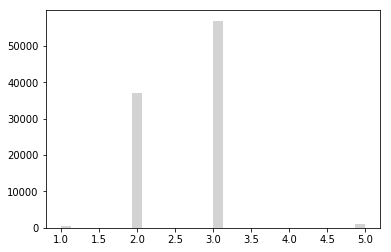

-----------------------------------------------------------------------------------------------


In [8]:
IDcruncher(ID_Vars)

In [9]:
cross1 = pd.crosstab(EntireSample['CurrencyCode'], EntireSample['CountryCode'])

cross1


CountryCode,256
CurrencyCode,
UGX,95662


In [10]:
EntireSample['CurrencyCode'].describe()

count     95662
unique        1
top         UGX
freq      95662
Name: CurrencyCode, dtype: object

In [11]:
EntireSample['CountryCode'].describe()

count    95662.0
mean       256.0
std          0.0
min        256.0
25%        256.0
50%        256.0
75%        256.0
max        256.0
Name: CountryCode, dtype: float64

It is safe to say that the above two variables can be dropped. They are constant

In [12]:

def ChrisCross(cross_vars,targ):

    for var in cross_vars:
        ' This function loops through categoricals'
        print(var)

        cross=pd.crosstab(EntireSample[var], EntireSample[targ])
        print(cross)
        
        cross.plot.bar(stacked=True,color=['lightgrey','red'])
        plt.legend(title='Target')

        plt.show()
        

        print("-----------------------------------------------------------------------------------------------")


In [25]:
cross_vars=["ProviderId","ProductId","ProductCategory","ChannelId","PricingStrategy"]
targ='FraudResult'

ProviderId
FraudResult       0   1
ProviderId             
ProviderId_1   5586  57
ProviderId_2     18   0
ProviderId_3   3020  64
ProviderId_4  38184   5
ProviderId_5  14478  64
ProviderId_6  34183   3


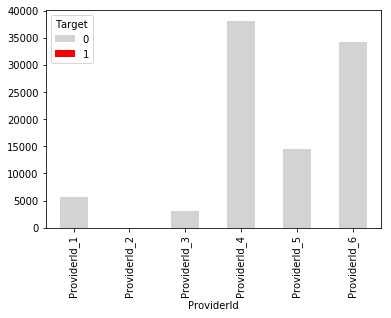

-----------------------------------------------------------------------------------------------
ProductId
FraudResult       0    1
ProductId               
ProductId_1    2885    0
ProductId_10  15378    6
ProductId_11   1377    0
ProductId_12      2    0
ProductId_13    290    6
ProductId_14    789    0
ProductId_15  11807  157
ProductId_16     10    0
ProductId_19    965    0
ProductId_2     236    0
ProductId_20    216    0
ProductId_21   1508    4
ProductId_22    110    2
ProductId_23      1    0
ProductId_24    175    0
ProductId_27     31    0
ProductId_3   24332   12
ProductId_4    2403    0
ProductId_5      23    2
ProductId_6   32634    1
ProductId_7      86    0
ProductId_8     197    0
ProductId_9      14    3


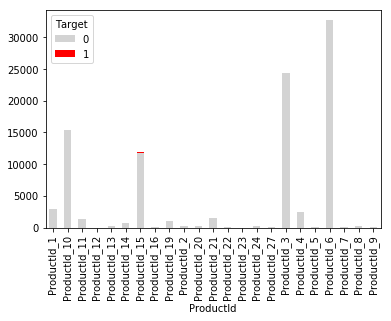

-----------------------------------------------------------------------------------------------
ProductCategory
FraudResult             0    1
ProductCategory               
airtime             45009   18
data_bundles         1613    0
financial_services  45244  161
movies                175    0
other                   2    0
ticket                216    0
transport              23    2
tv                   1279    0
utility_bill         1908   12


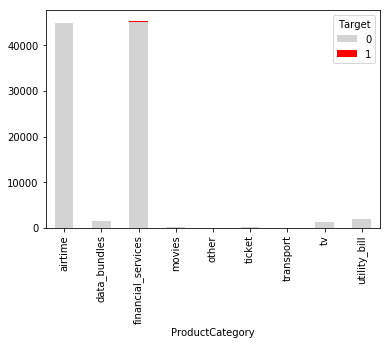

-----------------------------------------------------------------------------------------------
ChannelId
FraudResult      0    1
ChannelId              
ChannelId_1    534    4
ChannelId_2  37136    5
ChannelId_3  56751  184
ChannelId_5   1048    0


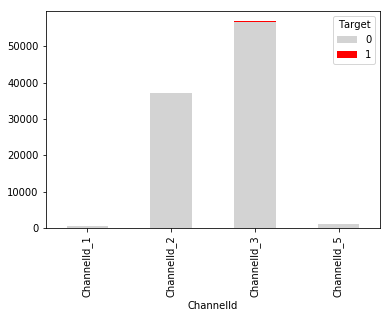

-----------------------------------------------------------------------------------------------
PricingStrategy
FraudResult          0    1
PricingStrategy            
0                  349   36
1                 1860    7
2                79709  139
4                13551   11


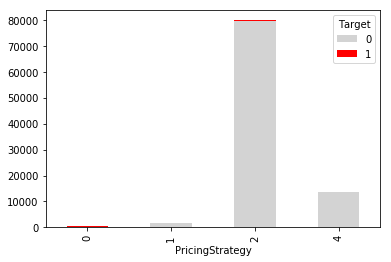

-----------------------------------------------------------------------------------------------


In [26]:
ChrisCross(cross_vars,targ)

In [15]:
#Determine pivot table
Pivots = pd.DataFrame(EntireSample.pivot_table(values=["FraudResult"], index=["ProviderId","ProductId","ProductCategory","ChannelId"], aggfunc=np.mean))


FraudResult
ProviderId   ProductId    ProductCategory    ChannelId               
ProviderId_1 ProductId_1  airtime            ChannelId_3     0.000000
             ProductId_10 airtime            ChannelId_1     0.000000
                                             ChannelId_3     0.003053
             ProductId_11 data_bundles       ChannelId_3     0.000000
             ProductId_13 utility_bill       ChannelId_3     0.000000
             ProductId_14 financial_services ChannelId_3     0.000000
             ProductId_15 financial_services ChannelId_1     0.000000
                                             ChannelId_3     0.015597
             ProductId_16 airtime            ChannelId_3     0.000000
             ProductId_19 tv                 ChannelId_3     0.000000
             ProductId_2  data_bundles       ChannelId_3     0.000000
             ProductId_20 ticket             ChannelId_1     0.000000
                                             ChannelId_3     0.000000
             ProductId_21 utility_bill       ChannelId_1     0.000000
                                             ChannelId_3     0.000000
             ProductId_22 utility_bill       ChannelId_3     0.000000
             ProductId_24 movies             ChannelId_3     0.000000
             ProductId_27 tv                 ChannelId_3     0.000000
             ProductId_3  airtime            ChannelId_1     0.000000
                                             ChannelId_3     0.000000
             ProductId_4  airtime            ChannelId_1     0.000000
                                             ChannelId_3     0.000000
             ProductId_5  transport          ChannelId_3     0.181818
             ProductId_7  tv                 ChannelId_3     0.000000
             ProductId_8  tv                 ChannelId_1     0.000000
                                             ChannelId_3     0.000000
             ProductId_9  financial_services ChannelId_1     0.000000
ProviderId_2 ProductId_1  airtime            ChannelId_3     0.000000
             ProductId_10 airtime            ChannelId_3     0.000000
             ProductId_11 data_bundles       ChannelId_3     0.000000
...                                                               ...
ProviderId_6 ProductId_10 airtime            ChannelId_1     0.000000
                                             ChannelId_3     0.000095
             ProductId_11 data_bundles       ChannelId_1     0.000000
                                             ChannelId_3     0.000000
             ProductId_13 utility_bill       ChannelId_1     0.000000
                                             ChannelId_3     0.000000
             ProductId_14 financial_services ChannelId_3     0.000000
             ProductId_15 financial_services ChannelId_1     0.000000
             ProductId_16 airtime            ChannelId_3     0.000000
             ProductId_19 tv                 ChannelId_1     0.000000
                                             ChannelId_3     0.000000
             ProductId_2  data_bundles       ChannelId_1     0.000000
                                             ChannelId_3     0.000000
             ProductId_20 ticket             ChannelId_1     0.000000
                                             ChannelId_3     0.000000
             ProductId_21 utility_bill       ChannelId_1     0.000000
                                             ChannelId_3     0.000000
             ProductId_22 utility_bill       ChannelId_3     0.000000
             ProductId_24 movies             ChannelId_1     0.000000
                                             ChannelId_3     0.000000
             ProductId_27 tv                 ChannelId_3     0.000000
             ProductId_3  airtime            ChannelId_1     0.000000
                                             ChannelId_3     0.000124
             ProductId_4  airtime            ChannelId_1     0.000000
                                             ChannelId_3     0.00000

In [27]:
plt.scatter(EntireSample["Amount"])

EntireSample["Amount"].describe()

TypeError: scatter() missing 1 required positional argument: 'y'

In [30]:
EntireSample["Amount"].describe()

count    9.566200e+04
mean     6.717846e+03
std      1.233068e+05
min     -1.000000e+06
25%     -5.000000e+01
50%      1.000000e+03
75%      2.800000e+03
max      9.880000e+06
Name: Amount, dtype: float64

In [34]:
EntireSample.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionId_Num,BatchId_Num,AccountId_Num,SubscriptionId_Num,CustomerId_Num,ProviderId_Num,ProductId_Num,ChannelId_Num
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,76871,36123,3957,887,4406,6,10,3
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,73770,15642,4841,3829,4406,4,6,2
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,26203,53941,4229,222,4683,6,1,3
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,380,102363,648,2185,988,1,21,3
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,28195,38780,4841,3829,988,4,6,2


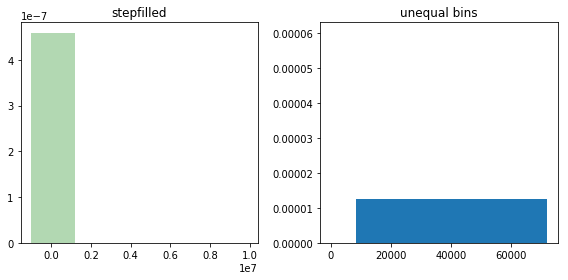

In [33]:

x = EntireSample["Amount"]

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))

ax0.hist(x, 5,range=[-100000, 100000], density=True, histtype='stepfilled', facecolor='g', alpha=0.3)
ax0.set_title('stepfilled')

# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300,80000]
ax1.hist(x, bins, density=True, histtype='bar', rwidth=0.8)
ax1.set_title('unequal bins')

fig.tight_layout()
plt.show()

In [35]:
plt.style.use('fivethirtyeight')

x = EntireSample["TransactionStartTime"]

fig, ax = plt.subplots()

ax.plot(x, EntireSample["Amount"])
#ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
#ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
#ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
#ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
#ax.plot(x, np.sin(x) + np.random.randn(50))
ax.set_title("'fivethirtyeight' style sheet")

plt.show()

KeyboardInterrupt: 